<a href="https://colab.research.google.com/github/NibroosAbrar/House_Price_Predict_Analyze/blob/main/Projek_Predictive_Analysis_Nibroos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive untuk membaca file CSV
import os
from google.colab import drive
drive.mount('/content/drive')

loc = '/content/drive/My Drive/laskar ai/Projek Predictive Analysis'
os.chdir(loc)

os.getcwd()

Mounted at /content/drive


'/content/drive/My Drive/laskar ai/Projek Predictive Analysis'

# Install Package dan Library

In [2]:
!pip install xgboost

# Import Package dan Library

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load Data

In [4]:
file_path = '/content/drive/MyDrive/laskar ai/Projek Predictive Analysis/house_price_regression_dataset.csv'
df = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)

In [5]:
print("Ukuran dataset:", df.shape)
print("\nTipe data:")
print(df.dtypes)

Ukuran dataset: (1000, 8)

Tipe data:
Square_Footage            int64
Num_Bedrooms              int64
Num_Bathrooms             int64
Year_Built                int64
Lot_Size                float64
Garage_Size               int64
Neighborhood_Quality      int64
House_Price             float64
dtype: object


In [6]:
print("\n5 data teratas:")
print(df.head())


5 data teratas:
   Square_Footage  Num_Bedrooms  Num_Bathrooms  Year_Built  Lot_Size  \
0            1360             2              1        1981  0.599637   
1            4272             3              3        2016  4.753014   
2            3592             1              2        2016  3.634823   
3             966             1              2        1977  2.730667   
4            4926             2              1        1993  4.699073   

   Garage_Size  Neighborhood_Quality   House_Price  
0            0                     5  2.623829e+05  
1            1                     6  9.852609e+05  
2            0                     9  7.779774e+05  
3            1                     8  2.296989e+05  
4            0                     8  1.041741e+06  


In [7]:
print("\nCek missing values:")
print(df.isnull().sum())


Cek missing values:
Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


In [8]:
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000          

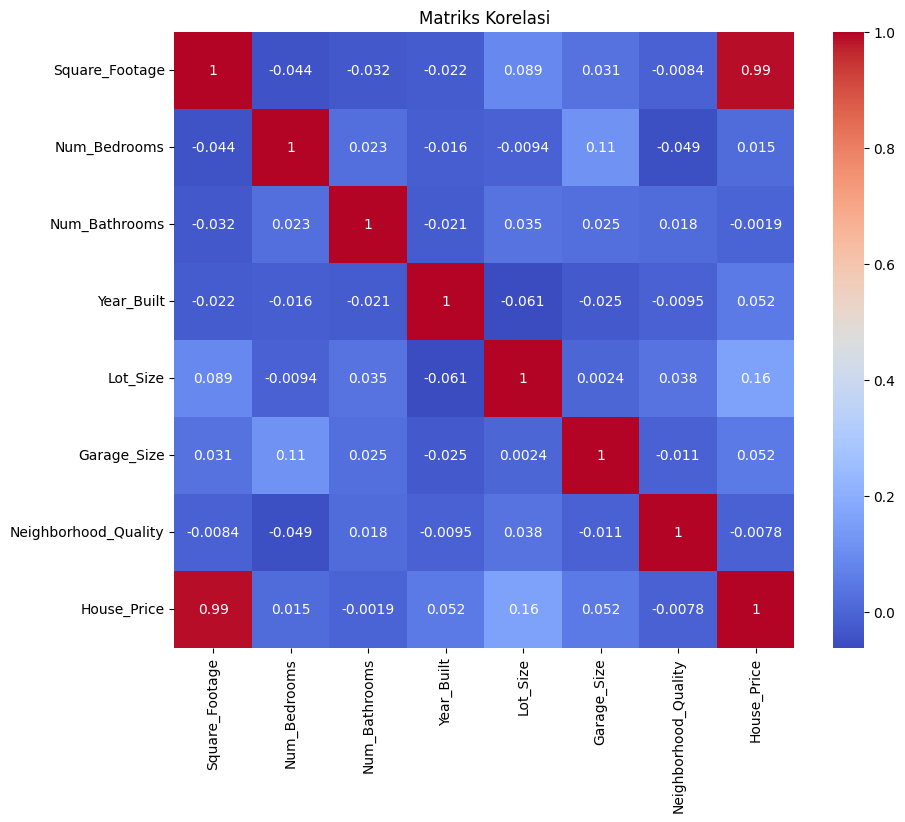

In [9]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

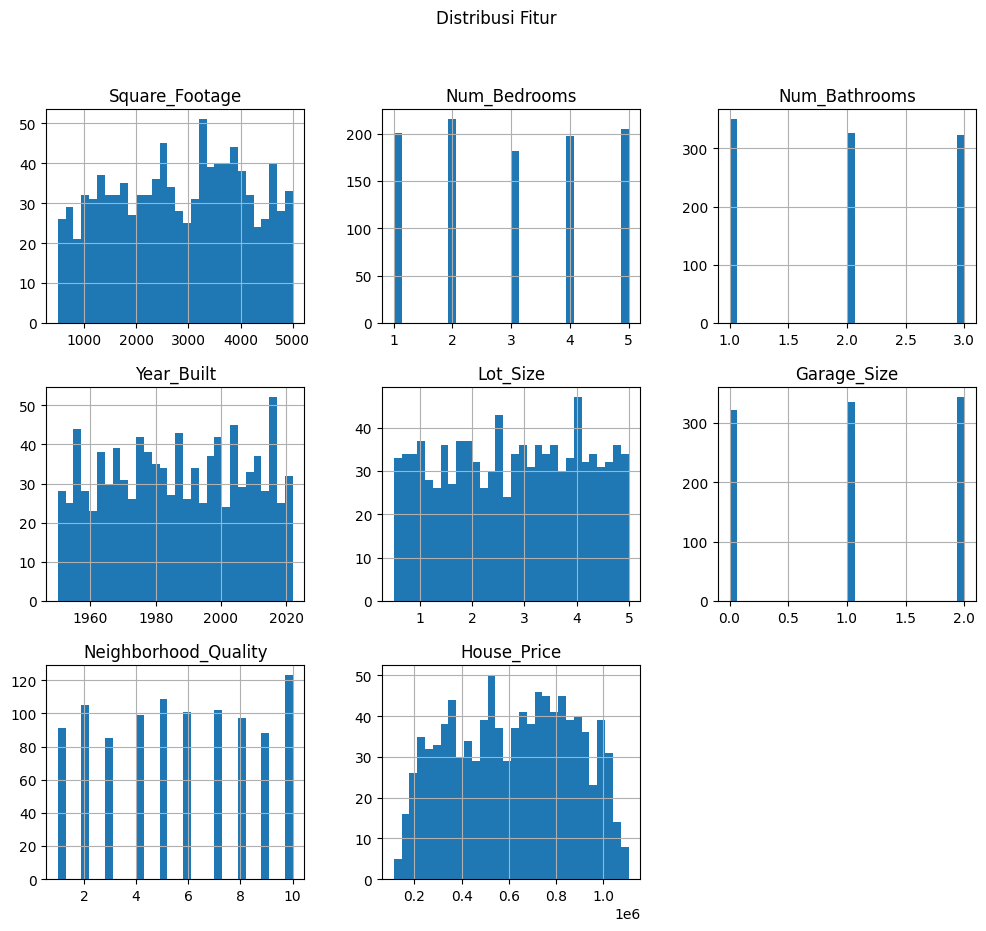

In [10]:
# Histogram untuk distribusi
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribusi Fitur")
plt.show()

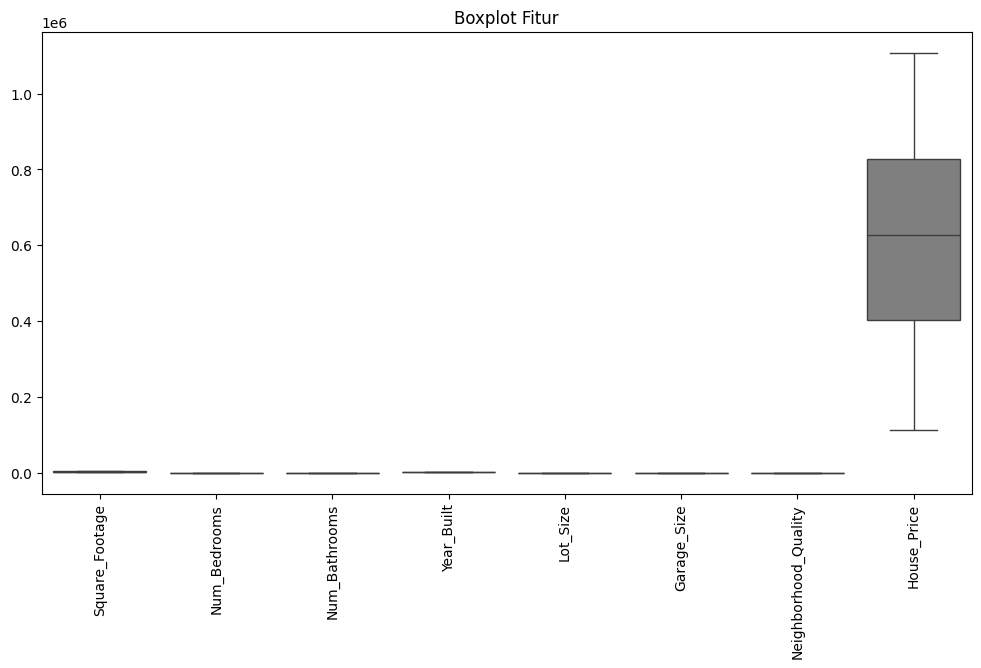

In [11]:
# Boxplot untuk mendeteksi outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot Fitur")
plt.show()

# Data Pre-Processing

In [12]:
# Hapus kolom yang tidak relevan (opsional)
# df = df.drop(columns=['id', 'nama'])

In [13]:
# Tangani missing values (jika ada)
df = df.dropna()  # Atau bisa juga df.fillna(df.mean())

In [14]:
# Pisahkan fitur dan target
# Ganti 'target' dengan nama kolom target kamu
X = df.drop(columns='House_Price')
y = df['House_Price']

In [15]:
# Cek apakah ada fitur kategorikal
categorical_columns = X.select_dtypes(include='object').columns
if len(categorical_columns) > 0:
    print("\nFitur kategorikal ditemukan:", categorical_columns)
    X = pd.get_dummies(X, columns=categorical_columns)

# Split Data dan Scaling

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Bangun Model

In [18]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [19]:
# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluasi Model

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model_full(name, model, X_train, X_test, y_train, y_test):
    # Prediksi
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Hitung metrik
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

    # Cetak hasil
    print(f"\nModel: {name}")
    print("R² Train :", r2_train)
    print("R² Test  :", r2_test)
    print("RMSE     :", rmse_test)
    print("MAE      :", mae_test)
    print("MAPE (%) :", mape_test)

    # Evaluasi kondisi model
    if r2_train > 0.9 and r2_test < 0.7:
        print("⚠️  Model mengalami OVERFITTING.")
    elif r2_train < 0.5 and r2_test < 0.5:
        print("⚠️  Model kemungkinan UNDERFITTING.")
    elif abs(r2_train - r2_test) < 0.1:
        print("✅ Model FIT dengan baik (Balanced).")
    else:
        print("🔍 Model butuh tuning lebih lanjut.")

    # Feature Importance (jika tersedia)
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]

        importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 5))
        plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
        plt.xlabel("Importance")
        plt.title(f"Feature Importance - {name}")
        plt.gca().invert_yaxis()
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()



Model: Random Forest
R² Train : 0.9989092102182057
R² Test  : 0.9938855300068556
RMSE     : 19852.751634119493
MAE      : 16114.289643937647
MAPE (%) : 3.2426519234559477
✅ Model FIT dengan baik (Balanced).


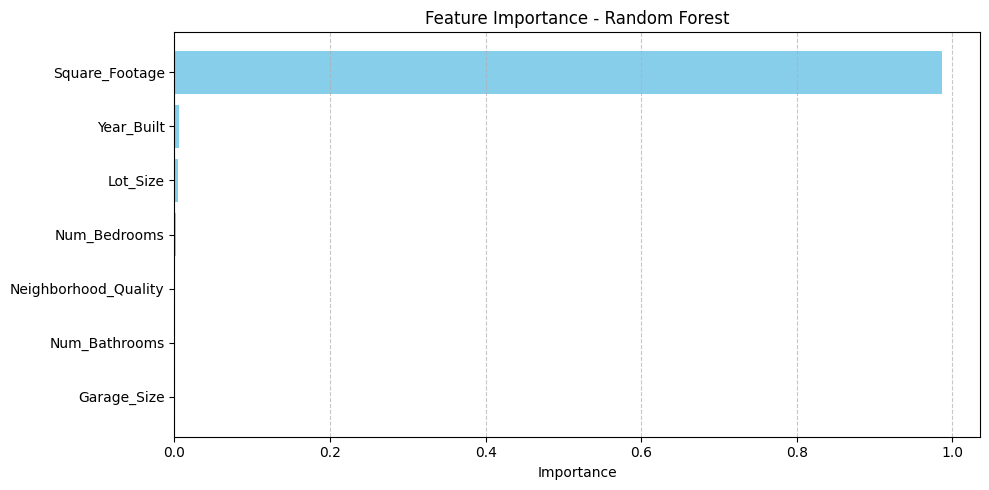

In [21]:
# Evaluasi Random Forest
evaluate_model_full("Random Forest", rf, X_train, X_test, y_train, y_test)


Model: XGBoost
R² Train : 0.9998483669111164
R² Test  : 0.9963244629586064
RMSE     : 15392.235603260246
MAE      : 12539.325268168086
MAPE (%) : 2.6153490267549517
✅ Model FIT dengan baik (Balanced).


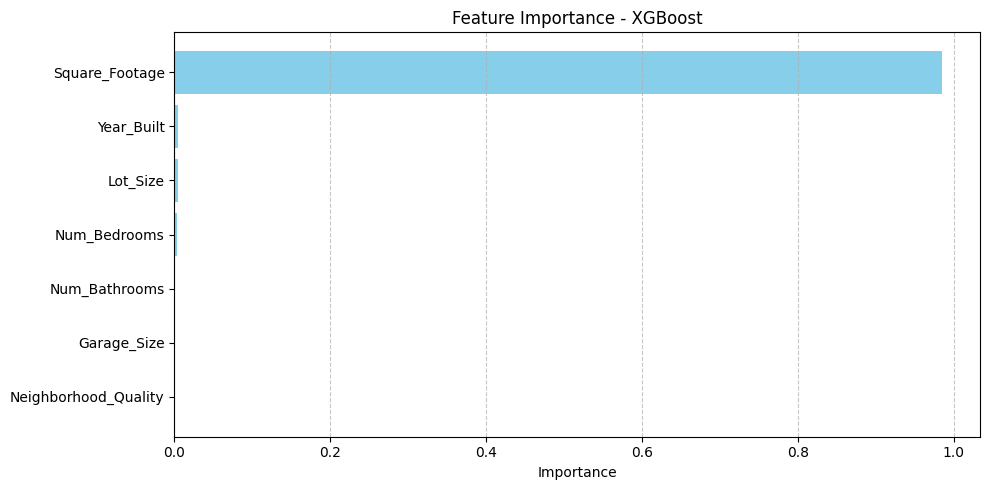

In [22]:
# Evaluasi XGBoost
evaluate_model_full("XGBoost", xgb, X_train, X_test, y_train, y_test)

# Save Model

In [23]:
import joblib

# Simpan model ke file .pkl
joblib.dump(rf, 'model_random_forest.pkl')
joblib.dump(xgb, 'model_xgboost.pkl')
print("✅ Model berhasil disimpan")

✅ Model berhasil disimpan


# Inferensi

In [24]:
def predict_from_input(model_name, input_dict):
    # Load model berdasarkan nama
    model_path = f"model_{model_name.lower()}.pkl"
    model = joblib.load(model_path)

    # Buat dataframe dari input
    input_df = pd.DataFrame([input_dict])

    # Prediksi
    prediction = model.predict(input_df)[0]
    print(f"📢 Prediksi dengan {model_name}: {prediction}")
    return prediction


In [25]:
# Contoh input (sesuai fitur yang kamu sebut)
sample_input = {
    'Square_Footage': 2000,
    'Num_Bedrooms': 3,
    'Num_Bathrooms': 2,
    'Year_Built': 2010,
    'Lot_Size': 0.5,
    'Garage_Size': 2,
    'Neighborhood_Quality': 8
}

# Prediksi
predict_from_input('xgboost', sample_input)


📢 Prediksi dengan xgboost: 459153.03125


np.float32(459153.03)